In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
df_master = pd.read_csv('../data/pokemon_alopez247.csv')
df_master = df_master.set_index('Number')

print 'There are %s total features in the data set. \n' % len( list(df_master))
print list(df_master)
print ''
print 'Let''s get rid of a few features that we won''t need for this exercise.'
print 'Leaving us with the following data set.'

df_master = df_master[ df_master.isLegendary == False]
df_master = df_master.drop([ 'isLegendary', 'hasMegaEvolution', 'Generation'], axis=1)
df_master.head()

There are 22 total features in the data set. 

['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']

Lets get rid of a few features that we wont need for this exercise.
Leaving us with the following data set.


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Green,True,0.875,Monster,Grass,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Green,True,0.875,Monster,Grass,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Green,True,0.875,Monster,Grass,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Red,True,0.875,Monster,Dragon,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,Red,True,0.875,Monster,Dragon,1.09,19.0,45,bipedal_tailed


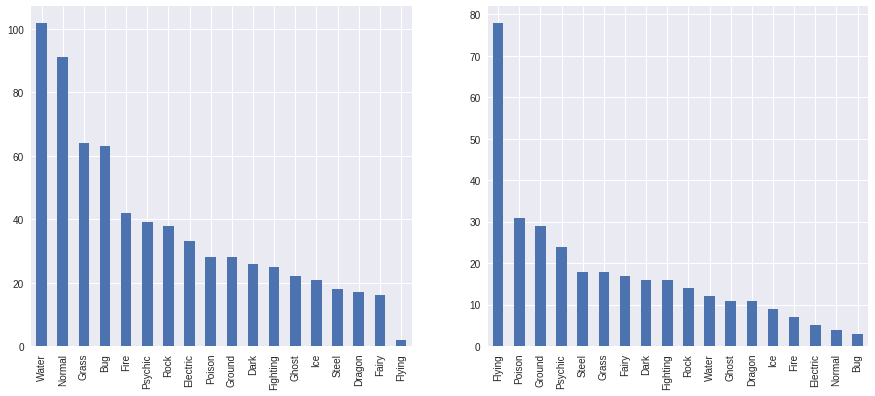

In [3]:
plt.figure( figsize=(15,15))
plt.subplots_adjust( hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
df_master['Type_1'].value_counts().plot( kind='bar')

plt.subplot(2,2,2)
df_master.Type_2[  df_master['Type_2'].notnull()].value_counts().plot( kind='bar')

Pokemon can take on a variety of different types. Above the frequency of different `Type_1` and `Type_2` values are shown.

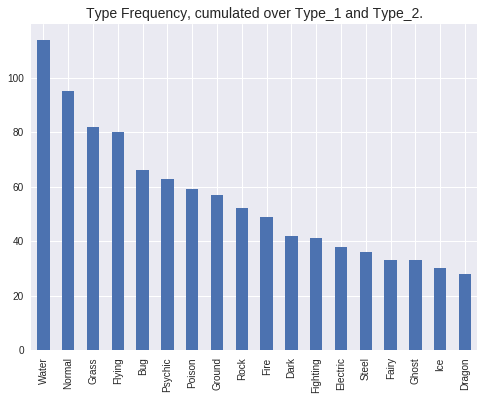

In [4]:
typeCombo = pd.Series( df_master['Type_1'].value_counts() + df_master['Type_2'].value_counts())
typeCombo = typeCombo.sort_values( ascending=False)

plt.figure( figsize=(8,6))
plt.title( 'Type Frequency, cumulated over Type_1 and Type_2.', fontsize=14)
typeCombo.plot( kind='bar')

As shown above, Water type is the most prevelant type.

## Water Type Prediction

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
df_water = df_master
df_water.Type_2.loc[ df_master['Type_2'].isnull() == True] = ''
typeSeries = df_water['Type_1'] + '|' + df_water['Type_2']
typeMatrix = typeSeries.str.get_dummies('|')

df_water = pd.merge( typeMatrix, df_water.drop([ 'Type_1', 'Type_2'], axis=1), left_index=True, right_index=True)
df_water = df_water.drop(['Grass', 'Fire', 'Flying', 'Bug', 'Normal',
                          'Poison', 'Electric', 'Ground', 'Fairy',
                          'Fighting', 'Psychic', 'Rock', 'Ghost',
                          'Ice', 'Dragon', 'Dark', 'Steel'], axis=1)

df_water.head()

/home/julien/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Water,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,
1,0,Bulbasaur,318,45,49,49,65,65,45,Green,True,0.875,Monster,Grass,0.71,6.9,45,quadruped
2,0,Ivysaur,405,60,62,63,80,80,60,Green,True,0.875,Monster,Grass,0.99,13.0,45,quadruped
3,0,Venusaur,525,80,82,83,100,100,80,Green,True,0.875,Monster,Grass,2.01,100.0,45,quadruped
4,0,Charmander,309,39,52,43,60,50,65,Red,True,0.875,Monster,Dragon,0.61,8.5,45,bipedal_tailed
5,0,Charmeleon,405,58,64,58,80,65,80,Red,True,0.875,Monster,Dragon,1.09,19.0,45,bipedal_tailed


In [7]:
floatList = [ 'Total', 'HP', 'Attack', 'Defense',
              'Sp_Atk', 'Sp_Def', 'Speed', 'hasGender', 'Catch_Rate']

for feature in floatList:
    df_water[ feature] = df_water[ feature].astype('float64')

In [8]:
df_water = df_water.drop(['Name', 'Color', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'Body_Style'], axis=1)

df_water.head()

,Water,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,Height_m,Weight_kg,Catch_Rate
Number,,,,,,,,,,,,
1,0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.71,6.9,45.0
2,0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.99,13.0,45.0
3,0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,2.01,100.0,45.0
4,0,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.61,8.5,45.0
5,0,405.0,58.0,64.0,58.0,80.0,65.0,80.0,1.0,1.09,19.0,45.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model    import LogisticRegression
from sklearn.pipeline        import Pipeline
from sklearn import metrics
from sklearn import preprocessing

In [10]:
# gridsearch estimator
pipe = Pipeline( steps=[( 'clfLog', LogisticRegression())] )
estimator = GridSearchCV( pipe,
                         dict( clfLog__C=np.logspace(-4, 4, 5)) )

In [11]:
# split data into features and output
columnIdx = df_water.columns
features  = df_water[ columnIdx[1:]]
typeWater = df_water['Water']

In [12]:
estimator.fit( features, typeWater)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('clfLog', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clfLog__C': array([  1.00000e-04,   1.00000e-02,   1.00000e+00,   1.00000e+02,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

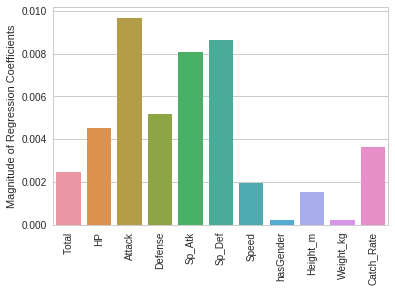

In [13]:
clfLog_coef = estimator.best_estimator_.named_steps['clfLog'].coef_[0]
features.columns
sns.set_style("whitegrid")
sns.barplot( x=features.columns, y=abs(clfLog_coef))
plt.xticks(rotation=90);
plt.ylabel('Magnitude of Regression Coefficients')

In [16]:
print 'Accuracy of model = %.3f'  % estimator.best_score_

Accuracy of model = 0.831


In [24]:
# get best performing model from estimator
clf_log = estimator.best_estimator_
# Make training and test data sets so that we can produce a classification report.
X_train, X_test, y_train, y_test = train_test_split( features, typeWater, test_size=0.50, random_state=11)
y_predict = clf_log.predict( X_test)
print 'Summary metrics for Logistic Regression: \n %s' \
        % metrics.classification_report( y_test, y_predict)

Summary metrics for Logistic Regression: 
              precision    recall  f1-score   support

          0       0.82      1.00      0.90       278
          1       0.00      0.00      0.00        60

avg / total       0.68      0.82      0.74       338



As you can see, although the model has an accuracy of 83%, in fact it did not perform very well since none of the water types (class = 1) were correctly predicted.

### Battle Attribute Normalization

Let's try some feature normalization in order to improve our results. We will normalize the pokemon battle attributes `HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def` and `Speed`. The sume of all these features is the Pokemon's `Total`. Some pokemon are inherently stronger than others, so they will have all around higher battle attributes than weaker pokemon. In order to have all pokemon on an even footing, we will normalize the battle features by the `Total`.

In [26]:
battleFeatures = [ 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'HP', 'Speed']
for b in battleFeatures:
    df_water[b] = df_water[b] / df_water['Total']

In [32]:
# split data into features and output
columnIdx = df_water.columns
features  = df_water[ columnIdx[1:]]
typeWater = df_water['Water']

df_water.head()

,Water,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,Height_m,Weight_kg,Catch_Rate
Number,,,,,,,,,,,,
1,0,318.0,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,1.0,0.71,6.9,45.0
2,0,405.0,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,1.0,0.99,13.0,45.0
3,0,525.0,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,1.0,2.01,100.0,45.0
4,0,309.0,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1.0,0.61,8.5,45.0
5,0,405.0,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1.0,1.09,19.0,45.0


Accuracy of model = 0.831


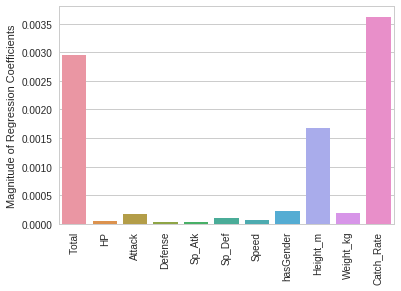

In [35]:
# gridsearch estimator
pipe = Pipeline( steps=[( 'clfLog', LogisticRegression())] )
estimator = GridSearchCV( pipe,
                         dict( clfLog__C=np.logspace(-4, 4, 5)) )

estimator.fit( features, typeWater)
print 'Accuracy of model = %.3f'  % estimator.best_score_

clfLog_coef = estimator.best_estimator_.named_steps['clfLog'].coef_[0]
features.columns
sns.set_style("whitegrid")
sns.barplot( x=features.columns, y=abs(clfLog_coef))
plt.xticks(rotation=90);
plt.ylabel('Magnitude of Regression Coefficients')

In [34]:
# get best performing model from estimator
clf_log = estimator.best_estimator_
# Make training and test data sets so that we can produce a classification report.
X_train, X_test, y_train, y_test = train_test_split( features, typeWater, test_size=0.50, random_state=11)
y_predict = clf_log.predict( X_test)
print 'Summary metrics for Logistic Regression: \n %s' \
        % metrics.classification_report( y_test, y_predict)

Summary metrics for Logistic Regression: 
              precision    recall  f1-score   support

          0       0.82      1.00      0.90       278
          1       0.00      0.00      0.00        60

avg / total       0.68      0.82      0.74       338



In [63]:
scaler = preprocessing.StandardScaler()
scaler.fit( df_water[ [ 'Total', 'Height_m', 'Weight_kg', 'Catch_Rate']] )
#print scaler.mean_
#print scaler.transform( df_water[ [ 'Total', 'Height_m', 'Weight_kg', 'Catch_Rate']])
df_water[ [ 'Total', 'Height_m', 'Weight_kg', 'Catch_Rate']] = scaler.transform( df_water[ [ 'Total', 'Height_m', 'Weight_kg', 'Catch_Rate']])

features  = df_water[ columnIdx[1:]]
typeWater = df_water['Water']

df_water.head()

,Water,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,Height_m,Weight_kg,Catch_Rate
Number,,,,,,,,,,,,
1,0,-0.874175,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,1.0,-0.377269,-0.606716,-0.822972
2,0,0.008507,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,1.0,-0.072030,-0.514169,-0.822972
3,0,1.226001,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,1.0,1.039913,0.805761,-0.822972
4,0,-0.965487,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1.0,-0.486283,-0.582441,-0.822972
5,0,0.008507,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1.0,0.036984,-0.423139,-0.822972


Accuracy of model = 0.831


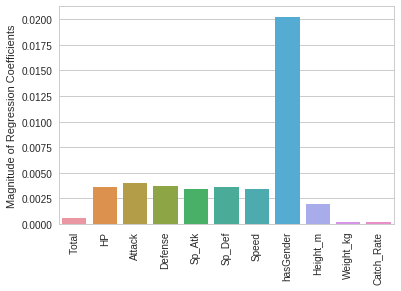

In [64]:
# gridsearch estimator
pipe = Pipeline( steps=[( 'clfLog', LogisticRegression())] )
estimator = GridSearchCV( pipe,
                         dict( clfLog__C=np.logspace(-4, 4, 5)) )

estimator.fit( features, typeWater)
print 'Accuracy of model = %.3f'  % estimator.best_score_

clfLog_coef = estimator.best_estimator_.named_steps['clfLog'].coef_[0]
features.columns
sns.set_style("whitegrid")
sns.barplot( x=features.columns, y=abs(clfLog_coef))
plt.xticks(rotation=90);
plt.ylabel('Magnitude of Regression Coefficients')

In [65]:
# get best performing model from estimator
clf_log = estimator.best_estimator_
# Make training and test data sets so that we can produce a classification report.
X_train, X_test, y_train, y_test = train_test_split( features, typeWater, test_size=0.50, random_state=11)
y_predict = clf_log.predict( X_test)
print 'Summary metrics for Logistic Regression: \n %s' \
        % metrics.classification_report( y_test, y_predict)

Summary metrics for Logistic Regression: 
              precision    recall  f1-score   support

          0       0.82      1.00      0.90       278
          1       0.00      0.00      0.00        60

avg / total       0.68      0.82      0.74       338

